In [133]:
#import libraries
import pandas as pd
import csv
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
import re
from collections import Counter
import pickle
import joblib
from sklearn.preprocessing import MultiLabelBinarizer


In [134]:
# read dataframe
df = pd.read_csv('zomato.csv')

In [135]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [137]:
df.head().T

,0,1,2,3,4
url,https://www.zomato.com/bangalore/jalsa-banasha...,https://www.zomato.com/bangalore/spice-elephan...,https://www.zomato.com/SanchurroBangalore?cont...,https://www.zomato.com/bangalore/addhuri-udupi...,https://www.zomato.com/bangalore/grand-village...
address,"942, 21st Main Road, 2nd Stage, Banashankari, ...","2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...","1112, Next to KIMS Medical College, 17th Cross...","1st Floor, Annakuteera, 3rd Stage, Banashankar...","10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."
name,Jalsa,Spice Elephant,San Churro Cafe,Addhuri Udupi Bhojana,Grand Village
online_order,Yes,Yes,Yes,No,No
book_table,Yes,No,No,No,No
rate,4.1/5,4.1/5,3.8/5,3.7/5,3.8/5
votes,775,787,918,88,166
phone,080 42297555\r\n+91 9743772233,080 41714161,+91 9663487993,+91 9620009302,+91 8026612447\r\n+91 9901210005
location,Banashankari,Banashankari,Banashankari,Banashankari,Basavanagudi
rest_type,Casual Dining,Casual Dining,"Cafe, Casual Dining",Quick Bites,Casual Dining


In [138]:
df.describe(include='all')

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Drop useless features
df= df.drop(columns=['url','name','phone','reviews_list', 'menu_item'])

## Handele missing data

In [140]:
df.isna().sum()

address                            0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [141]:
df.isna().sum()/df.shape[0] *100

address                         0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [142]:
# show unique value in rate to detrmain if there any string 
df['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [143]:
# replace string value with none
df['rate'] = df['rate'].replace('NEW', None)
df['rate'] = df['rate'].replace('-', None)

In [144]:
df.isna().sum()/df.shape[0] *100

address                         0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.436549
votes                           0.000000
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [145]:
# i will drop all missing data in rate becaouse it important coulmne and i dont want any bias 
df = df.dropna(subset=['rate'])


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41665 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      41665 non-null  object
 1   online_order                 41665 non-null  object
 2   book_table                   41665 non-null  object
 3   rate                         41665 non-null  object
 4   votes                        41665 non-null  int64 
 5   location                     41665 non-null  object
 6   rest_type                    41516 non-null  object
 7   dish_liked                   23462 non-null  object
 8   cuisines                     41654 non-null  object
 9   approx_cost(for two people)  41418 non-null  object
 10  listed_in(type)              41665 non-null  object
 11  listed_in(city)              41665 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.1+ MB


In [147]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

In [148]:
df['rate'].unique()


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [149]:
df.isna().sum()

address                            0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        149
dish_liked                     18203
cuisines                          11
approx_cost(for two people)      247
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [150]:
# drope all other missing data in 'rest_type','cuisines', its small number and dont effect
df = df.dropna(subset=['rest_type','cuisines'])


In [151]:
# Filling missing 'approx_cost(for two people)' with the median value
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)

In [152]:
df['dish_liked'].fillna('Unknown', inplace=True)

In [153]:
df.isna().sum()

address                        0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41505 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41505 non-null  object 
 1   online_order                 41505 non-null  object 
 2   book_table                   41505 non-null  object 
 3   rate                         41505 non-null  float64
 4   votes                        41505 non-null  int64  
 5   location                     41505 non-null  object 
 6   rest_type                    41505 non-null  object 
 7   dish_liked                   41505 non-null  object 
 8   cuisines                     41505 non-null  object 
 9   approx_cost(for two people)  41505 non-null  float64
 10  listed_in(type)              41505 non-null  object 
 11  listed_in(city)              41505 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.1+ MB


EDA and analysis

In [155]:
# Delete rows where votes are less than 3
df = df[df['votes'] >= 3]

# Verify the number of rows remaining
df.shape[0]

41474

In [156]:
df.isna().sum()

address                        0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [157]:
# Define 'success' column: 1 if rate is above 3.75, else 0
df['success'] = df['rate'].apply(lambda x: 1 if x > 3.75 else 0)

In [158]:
# handel the column address
df['address'].nunique()

8803

In [159]:
df['address_'] = df['address'].apply(lambda x: ', '.join(x.strip().split(',')[1:]))


In [160]:
df['address_']

0         21st Main Road,  2nd Stage,  Banashankari,  B...
1         80 Feet Road,  Near Big Bazaar,  6th Block,  ...
2         Next to KIMS Medical College,  17th Cross,  2...
3         Annakuteera,  3rd Stage,  Banashankari,  Bang...
4         3rd Floor,  Lakshmi Associates,  Gandhi Bazaa...
                               ...                        
51709     SAP Labs India,  KIADB Export Promotion Indus...
51711     Next To GR Tech Park,  Pattandur Agrahara,  I...
51712     43/3,  Whitefield Main Road,  Whitefield,  Ba...
51715     Prestige Shantiniketan,  ITPL Main Road,  Whi...
51716     KIADB Export Promotion Industrial Area,  ITPL...
Name: address_, Length: 41474, dtype: object

In [161]:
# Since address is a categorical variable with many unique values over 8800 ,
# One-hot encoding converts each unique address into a separate binary column. However, given the large number of unique addresses,
#  this might not be practical here.
# so We can use the address_freq (address frequency) column that encodes each address based on its occurrence.
address_freq = df['address_'].value_counts().to_dict()


In [162]:
# Sort the address frequencies from greatest to lowest
sorted_address_freq = dict(sorted(address_freq.items(), key=lambda x: x[1], reverse=True))

# Display the sorted address frequencies
for address, count in sorted_address_freq.items():
    print(f"{address}: {count}")

 Bangalore: 159
 Church Street,  Bangalore: 157
 KHB Colony,  Koramangala 5th Block,  Bangalore: 119
: 110
 MG Road,  Bangalore: 94
 Lavelle Road,  Bangalore: 92
 Brigade Road,  Bangalore: 85
 Koramangala 5th Block,  Bangalore: 75
 80 Feet Road,  Koramangala 4th Block,  Bangalore: 69
 Residency Road,  Bangalore: 67
 1st Main,  Koramangala 1st Block,  Bangalore: 66
 St. Marks Road,  Bangalore: 61
 99,  Residency Road,  Bangalore: 61
 Garuda Mall,  Magrath Road,  Ashok Nagar,  Brigade Road,  Bangalore: 60
 Koramangala 6th Block,  Bangalore: 59
 100 Feet Ring Road,  1st Phase,  2nd Stage,  BTM,  Bangalore: 59
 Cunningham Road,  Bangalore: 54
 Coles Road,  Frazer Town,  Bangalore: 51
 Whitefield,  Bangalore: 50
 Kensington Road,  Ulsoor,  Bangalore: 49
 2nd Stage,  BTM,  Bangalore: 48
 4th Sector,  HSR,  Bangalore: 47
 Thubarahalli,  Varthur Main Road,  Whitefield,  Bangalore: 46
 80 Feet Road,  4th Block,  Koramangala 4th Block,  Bangalore: 45
 Jyothi Nivas College Road,  Koramangala 5th 

In [163]:
df['address_freq'] = df['address_'].map(address_freq)

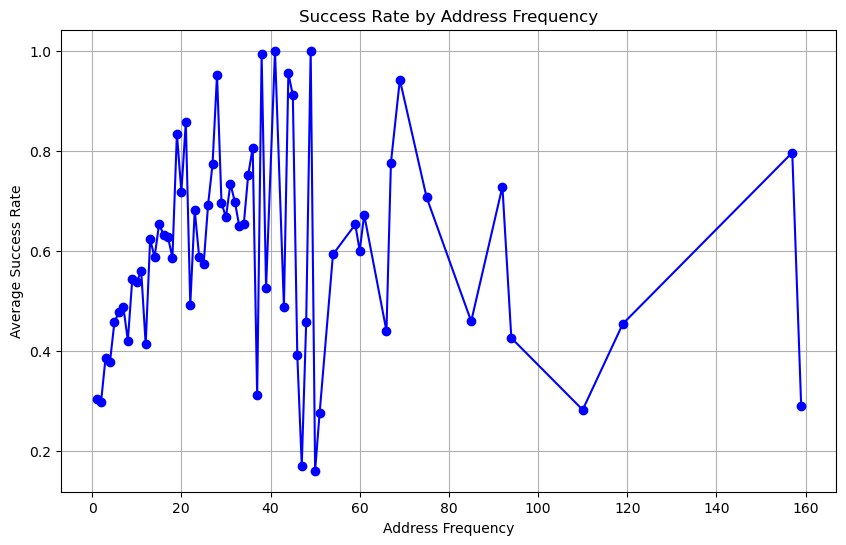

In [164]:
# Group by address frequency and calculate the average success rate
freq_success = df.groupby('address_freq')['success'].mean()

# Plot the success rate by address frequency
plt.figure(figsize=(10, 6))
plt.plot(freq_success.index, freq_success.values, marker='o', color='b')
plt.title('Success Rate by Address Frequency')
plt.xlabel('Address Frequency')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.show()


In [165]:
# Calculate the correlation between address frequency and success
correlation_address_success = df['address_freq'].corr(df['success'])
correlation_address_success

0.09956635578296436

In [166]:
# after all analysis in address i see it not important fetuer , so i will delet it in next step

In [167]:
# Encoding some categorical variables: online_order, book_table
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

 handel some category columne (location,listed_in(type), listed_in(city)) Use One-Hot Encoding

In [168]:
# the unique vale not so many so we will do just encoding for this 
df['location'].nunique()

92

In [169]:
# the unique vale not so many so we will do just encoding for this 
df['listed_in(type)'].nunique()

7

In [170]:
# the unique vale not so many so we will do just encoding for this 
df['listed_in(city)'].nunique()

30

In [171]:
# Use One-Hot Encoding for the categorical columns: 'location', 'listed_in(type)', 'listed_in(city)'
encoded_columns = pd.get_dummies(df[['location', 'listed_in(type)', 'listed_in(city)']], drop_first=True)

# Merge the one-hot encoded columns back with the original dataframe
df = pd.concat([df, encoded_columns], axis=1)

# Drop the original columns as they have been encoded
df.drop(columns=['location', 'listed_in(type)', 'listed_in(city)'], inplace=True)

# Display the first few rows of the new encoded dataframe
df.head()


,address,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),success,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,1,...,0,0,0,0,0,0,0,0,0,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,1,...,0,0,0,0,0,0,0,0,0,0
2,"1112, Next to KIMS Medical College, 17th Cross...",1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,1,...,0,0,0,0,0,0,0,0,0,0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,0,...,0,0,0,0,0,0,0,0,0,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,1,...,0,0,0,0,0,0,0,0,0,0


Handel the category columns that have many feature in one row ( dish_liked , rest_type',cuisines )

In [172]:
print(df['rest_type'].nunique())
print(df['cuisines'].nunique())
print(df['dish_liked'].nunique())



87
2369
5205


In [173]:
# Tokenize 'rest_type', 'cuisines', and 'dish_liked' columns
df['rest_type_tokens'] = df['rest_type'].fillna('').apply(lambda x: [rest_type.strip().lower() for rest_type in x.split(',')])
df['cuisines_tokens'] = df['cuisines'].fillna('').apply(lambda x: [cuisine.strip().lower() for cuisine in x.split(',')])
df['dish_liked_tokens'] = df['dish_liked'].fillna('').apply(lambda x: [dish.strip().lower() for dish in x.split(',')])

In [174]:
# because of the 'cuisines', and 'dish_liked' have more than 2000 features so i will pike the top 40 feature just
#  and delelt the rest
# Step 1: Flatten and count top 40 for dish_liked
all_dishes = [dish for sublist in df['dish_liked_tokens'] for dish in sublist if dish]
dish_counts = Counter(all_dishes)

# Get the top 40 most common dishes
top_40_dishes = [dish for dish, count in dish_counts.most_common(40)]

# Keep only the top 40 dishes in 'dish_liked_tokens'
df['dish_liked_tokens'] = df['dish_liked_tokens'].apply(lambda dishes: [dish for dish in dishes if dish in top_40_dishes])

# Step 2: Flatten and count top 40 for cuisines
all_cuisines = [cuisine for sublist in df['cuisines_tokens'] for cuisine in sublist if cuisine]
cuisine_counts = Counter(all_cuisines)

# Get the top 40 most common cuisines
top_40_cuisines = [cuisine for cuisine, count in cuisine_counts.most_common(40)]

# Keep only the top 40 cuisines in 'cuisines_tokens'
df['cuisines_tokens'] = df['cuisines_tokens'].apply(lambda cuisines: [cuisine for cuisine in cuisines if cuisine in top_40_cuisines])

In [129]:
# Step 3: One-hot encode the remaining features using MultiLabelBinarizer
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# One-hot encode 'dish_liked_tokens' and add prefix
dish_liked_encoded = pd.DataFrame(mlb.fit_transform(df['dish_liked_tokens']), columns=mlb.classes_, index=df.index)
dish_liked_encoded = dish_liked_encoded.add_prefix('dish_')

# One-hot encode 'cuisines_tokens' and add prefix
cuisines_encoded = pd.DataFrame(mlb.fit_transform(df['cuisines_tokens']), columns=mlb.classes_, index=df.index)
cuisines_encoded = cuisines_encoded.add_prefix('cuisine_')

# One-hot encode 'rest_type_tokens' and add prefix (KEEP ALL rest_types)
rest_type_encoded = pd.DataFrame(mlb.fit_transform(df['rest_type_tokens']), columns=mlb.classes_, index=df.index)
rest_type_encoded = rest_type_encoded.add_prefix('rest_type_')

In [175]:
# Step 4: Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, dish_liked_encoded, cuisines_encoded, rest_type_encoded], axis=1)

#  drop the original tokenized columns if no longer needed
df_encoded.drop(['dish_liked', 'cuisines', 'rest_type', 'dish_liked_tokens', 'cuisines_tokens', 'rest_type_tokens'], axis=1, inplace=True)

# Print the first few rows of the processed DataFrame to verify the result
df_encoded.head()

,address,online_order,book_table,rate,votes,approx_cost(for two people),success,address_,address_freq,location_Banashankari,...,rest_type_irani cafee,rest_type_kiosk,rest_type_lounge,rest_type_meat shop,rest_type_mess,rest_type_microbrewery,rest_type_pub,rest_type_quick bites,rest_type_sweet shop,rest_type_takeaway
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",1,1,4.1,775,800.0,1,"21st Main Road, 2nd Stage, Banashankari, B...",14,1,...,0,0,0,0,0,0,0,0,0,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",1,0,4.1,787,800.0,1,"80 Feet Road, Near Big Bazaar, 6th Block, ...",4,1,...,0,0,0,0,0,0,0,0,0,0
2,"1112, Next to KIMS Medical College, 17th Cross...",1,0,3.8,918,800.0,1,"Next to KIMS Medical College, 17th Cross, 2...",11,1,...,0,0,0,0,0,0,0,0,0,0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",0,0,3.7,88,300.0,0,"Annakuteera, 3rd Stage, Banashankari, Bang...",2,1,...,0,0,0,0,0,0,0,1,0,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",0,0,3.8,166,600.0,1,"3rd Floor, Lakshmi Associates, Gandhi Bazaa...",4,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
# Display all column names in the DataFrame
df_encoded.columns.tolist()

['address',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'approx_cost(for two people)',
 'success',
 'address_',
 'address_freq',
 'location_Banashankari',
 'location_Banaswadi',
 'location_Bannerghatta Road',
 'location_Basavanagudi',
 'location_Basaveshwara Nagar',
 'location_Bellandur',
 'location_Bommanahalli',
 'location_Brigade Road',
 'location_Brookefield',
 'location_CV Raman Nagar',
 'location_Central Bangalore',
 'location_Church Street',
 'location_City Market',
 'location_Commercial Street',
 'location_Cunningham Road',
 'location_Domlur',
 'location_East Bangalore',
 'location_Ejipura',
 'location_Electronic City',
 'location_Frazer Town',
 'location_HBR Layout',
 'location_HSR',
 'location_Hebbal',
 'location_Hennur',
 'location_Hosur Road',
 'location_ITPL Main Road, Whitefield',
 'location_Indiranagar',
 'location_Infantry Road',
 'location_JP Nagar',
 'location_Jalahalli',
 'location_Jayanagar',
 'location_Jeevan Bhima Nagar',
 'location_KR Puram',
 'location_K

In [177]:
# Calculate the correlation between the 'unknown' dish and the restaurant's rating
correlation_unknown_rate = df_encoded['dish_unknown'].corr(df_encoded['rate'])
correlation_unknown_rate

-0.5262538678261754

In [178]:
correlation_unknown_success = df_encoded['dish_unknown'].corr(df_encoded['success'])
correlation_unknown_success

-0.618327306587188

In [179]:
# Drop the 'unknown' column from the dataset Since the "unknown" column had a strong negative correlation 
# with both ratings and success,
#  removing it ensures that this negative correlation does not impact the models in an unintended way.
df_encoded.drop(columns=['dish_unknown'], inplace=True)

# Verify the column is removed
print(df_encoded.columns)


Index(['address', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'success', 'address_', 'address_freq',
       'location_Banashankari',
       ...
       'rest_type_irani cafee', 'rest_type_kiosk', 'rest_type_lounge',
       'rest_type_meat shop', 'rest_type_mess', 'rest_type_microbrewery',
       'rest_type_pub', 'rest_type_quick bites', 'rest_type_sweet shop',
       'rest_type_takeaway'],
      dtype='object', length=238)


In [180]:
df_encoded.dtypes[df_encoded.dtypes == 'object']


address     object
address_    object
dtype: object

# some analysis

In [181]:
# is there any imbalance in target
df_encoded.success.value_counts()

0    21254
1    20220
Name: success, dtype: int64

In [182]:
df_encoded.success.value_counts(normalize=True)

0    0.512466
1    0.487534
Name: success, dtype: float64

In [183]:
df_encoded.success.mean()

0.48753435887544005

In [184]:
df_encoded.groupby('online_order').success.mean()

online_order
0    0.429733
1    0.518261
Name: success, dtype: float64

In [185]:
df_encoded.groupby('book_table').success.mean()

book_table
0    0.409291
1    0.924298
Name: success, dtype: float64

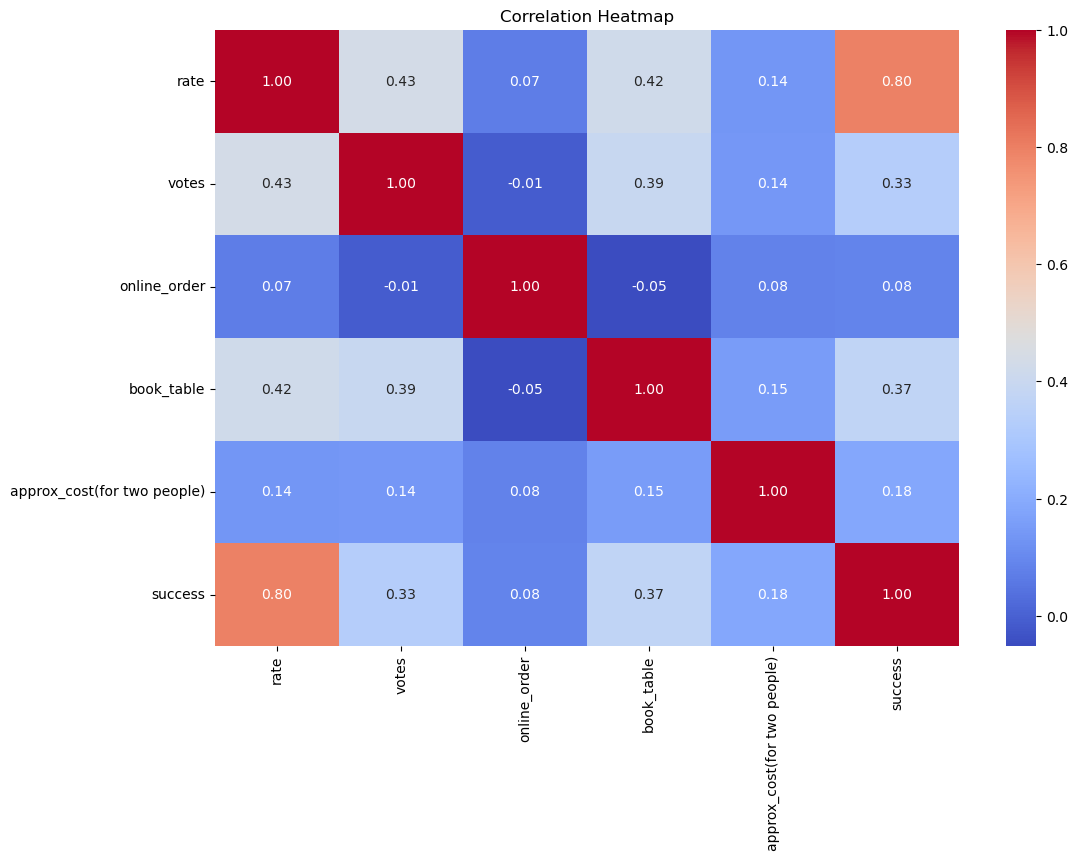

In [186]:
# Set up the figure for plotting
plt.figure(figsize=(12, 8))

# Plotting the correlation heatmap between numerical columns to identify relationships
correlation_matrix = df_encoded[['rate', 'votes','online_order','book_table', 'approx_cost(for two people)', 'success']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [200]:
# Calculate the correlation matrix between the location columns and the 'success' column
correlation_matrix = df_encoded.corr()

# Extract the correlation between 'success' and the one-hot encoded 'location' columns
location_correlation = correlation_matrix['success'].filter(like='location_')

# Display the correlation between locations and success
print(location_correlation)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_17216\3976725933.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



location_Banashankari         -0.003171
location_Banaswadi            -0.050752
location_Bannerghatta Road    -0.068151
location_Basavanagudi          0.001788
location_Basaveshwara Nagar   -0.007392
                                 ...   
location_West Bangalore       -0.008296
location_Whitefield           -0.034962
location_Wilson Garden        -0.028922
location_Yelahanka            -0.001923
location_Yeshwantpur          -0.027517
Name: success, Length: 91, dtype: float64


In [202]:
# Calculate the correlation matrix between the dish_liked columns and the 'success' column
correlation_matrix = df_encoded.corr()

# Extract the correlation between 'success' and the one-hot encoded 'dish_liked' columns
dish_correlation = correlation_matrix['success'].filter(like='dish_')

# Display the correlation between locations and success
print(dish_correlation)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_17216\3776321014.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



dish_beer                 0.156585
dish_biryani              0.081254
dish_brownie              0.112631
dish_burgers              0.195652
dish_butter chicken       0.052737
dish_chaat                0.086678
dish_chicken biryani      0.058756
dish_chicken curry        0.061446
dish_chicken grill        0.011118
dish_cocktails            0.251415
dish_coffee               0.126371
dish_dal makhani          0.072441
dish_fish                 0.136777
dish_fries                0.100178
dish_gulab jamun          0.063416
dish_hot chocolate        0.122242
dish_lassi                0.070792
dish_masala dosa          0.044835
dish_mocktails            0.210330
dish_momos                0.111835
dish_mutton biryani       0.065084
dish_nachos               0.170659
dish_noodles              0.113925
dish_paratha              0.028965
dish_pasta                0.219761
dish_pizza                0.219708
dish_rolls                0.045865
dish_roti                 0.052662
dish_salad          

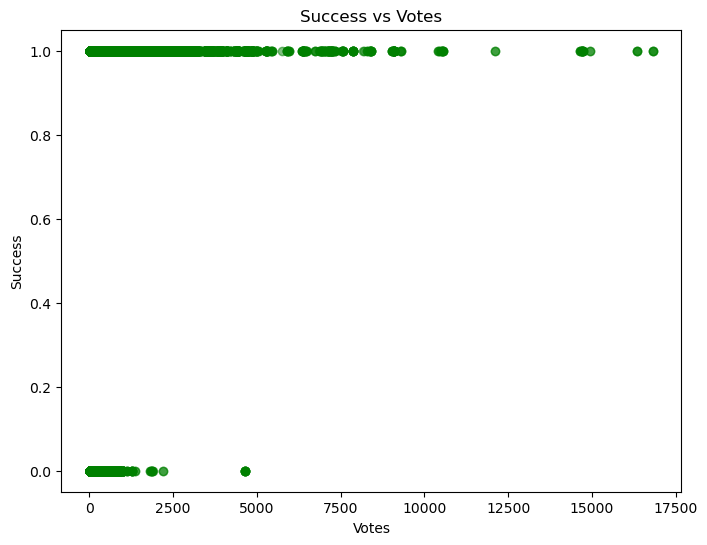

In [187]:
# Scatter plot for Success vs Votes
plt.figure(figsize=(8, 6))

plt.scatter(df_encoded['votes'], df['success'], alpha=0.5, color='green')
plt.title('Success vs Votes')
plt.xlabel('Votes')
plt.ylabel('Success')

plt.show()


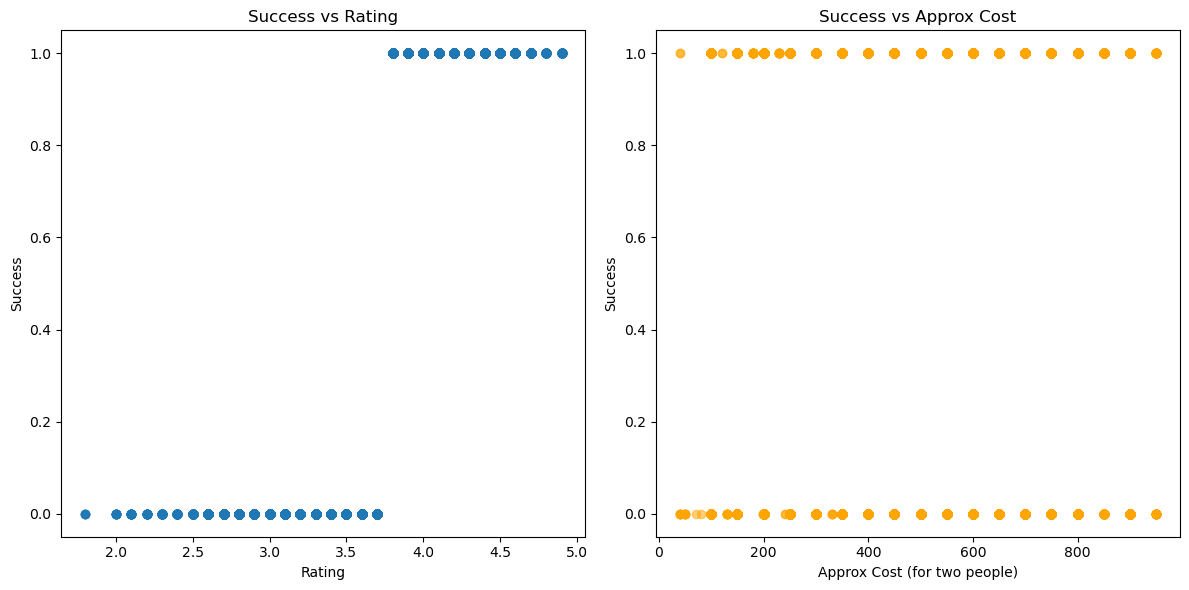

In [188]:
# Scatter plot for Success vs Rating
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_encoded['rate'], df_encoded['success'], alpha=0.5)
plt.title('Success vs Rating')
plt.xlabel('Rating')
plt.ylabel('Success')

# Scatter plot for Success vs Approx Cost
plt.subplot(1, 2, 2)
plt.scatter(df_encoded['approx_cost(for two people)'], df_encoded['success'], alpha=0.5, color='orange')
plt.title('Success vs Approx Cost')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Success')

plt.tight_layout()
plt.show()


In [189]:
# is There are outliers values in the price
px.box(df_encoded, x='approx_cost(for two people)')

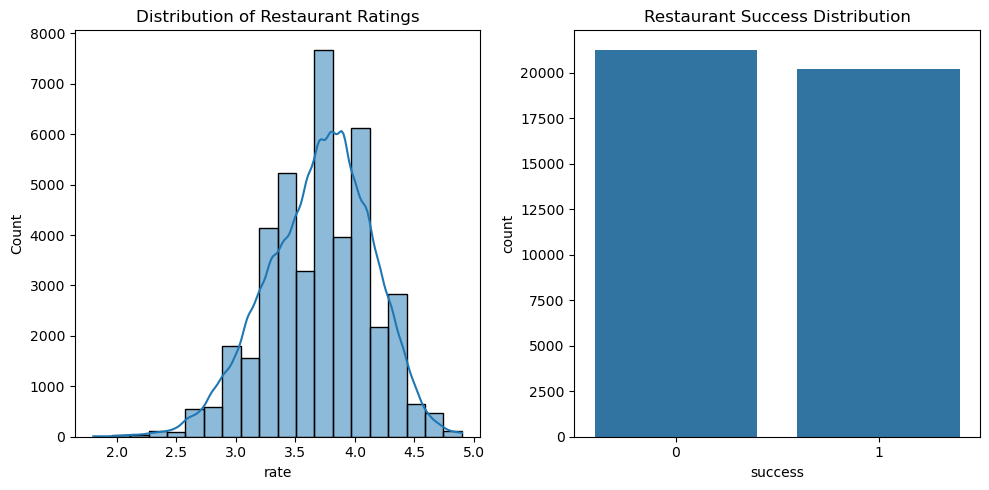

In [190]:
# Visualizing the distribution of the 'rate' and 'success'
plt.figure(figsize=(10, 5))

# Distribution of restaurant ratings
plt.subplot(1, 2, 1)
sns.histplot(df_encoded['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')

# Success Rate Count
plt.subplot(1, 2, 2)
sns.countplot(x='success', data=df)
plt.title('Restaurant Success Distribution')

plt.tight_layout()
plt.show()

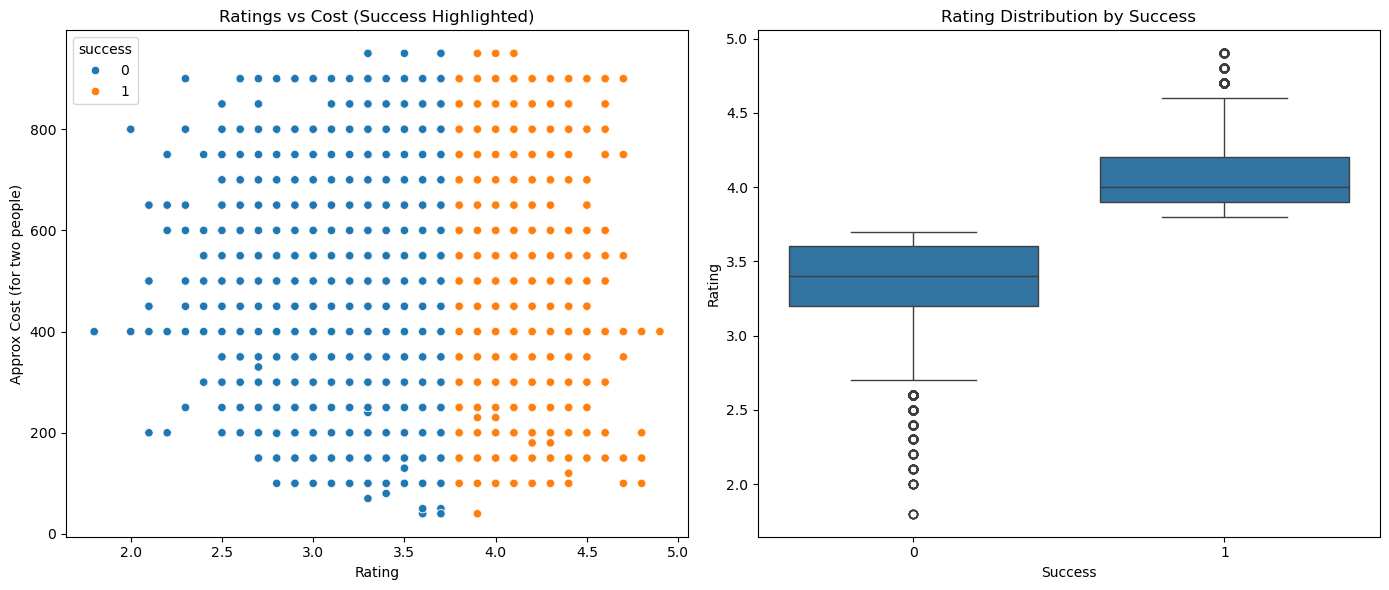

In [191]:
# Visualizing relationship between rating, cost, and success

plt.figure(figsize=(14, 6))

# Scatter plot of rating vs approx cost colored by success
plt.subplot(1, 2, 1)
sns.scatterplot(x='rate', y='approx_cost(for two people)', hue='success', data=df_encoded)
plt.title('Ratings vs Cost (Success Highlighted)')
plt.xlabel('Rating')
plt.ylabel('Approx Cost (for two people)')

# Box plot of rating by success
plt.subplot(1, 2, 2)
sns.boxplot(x='success', y='rate', data=df_encoded)
plt.title('Rating Distribution by Success')
plt.xlabel('Success')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

In [192]:
# Analyzing the distribution of ratings
rating_distribution = df_encoded['rate'].value_counts()
rating_distribution

3.9    3967
3.8    3864
3.7    3812
3.6    3286
4.0    3175
4.1    2947
3.5    2768
3.4    2466
3.3    2299
4.2    2184
3.2    1843
4.3    1692
3.1    1555
4.4    1147
3.0    1003
2.9     802
4.5     656
2.8     580
2.7     304
4.6     300
2.6     252
4.7     167
2.5     101
2.4      66
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [193]:

# Relationship between online order and success
online_order_success = pd.crosstab(df_encoded['online_order'], df_encoded['success'])
online_order_success

success,0,1
online_order,,
0,8209,6186
1,13045,14034


In [194]:
# Relationship between table booking and success
book_table_success = pd.crosstab(df_encoded['book_table'], df_encoded['success'])
book_table_success

success,0,1
book_table,,
0,20777,14396
1,477,5824


In [195]:
# Correlation between approximate cost and success
cost_success_corr = df_encoded[['approx_cost(for two people)', 'success']].corr()
cost_success_corr

,approx_cost(for two people),success
approx_cost(for two people),1.000000,0.184216
success,0.184216,1.000000


In [196]:
# Check correlation between rate, votes, and success
correlation_matrix = df_encoded[['rate', 'votes', 'success']].corr()

# Display the correlation matrix
print(correlation_matrix)


             rate     votes   success
rate     1.000000  0.434561  0.797864
votes    0.434561  1.000000  0.334289
success  0.797864  0.334289  1.000000


In [307]:
''' Rate and Success:
The correlation between rate and success is 0.7978, which is very high. This indicates that rate is strongly influencing 
the model’s ability to predict success, as the two variables are highly related.
Votes and Success:
The correlation between votes and success is 0.3343, which is moderate. While this is not as strong 
as the correlation with rate, it still suggests some influence on the model. 
so i will exclude rate and votes from the feature set '''

' Rate and Success:\nThe correlation between rate and success is 0.7978, which is very high. This indicates that rate is strongly influencing \nthe model’s ability to predict success, as the two variables are highly related.\nVotes and Success:\nThe correlation between votes and success is 0.3343, which is moderate. While this is not as strong \nas the correlation with rate, it still suggests some influence on the model. \nso i will exclude rate and votes from the feature set '

# Modeling

In [198]:
# Display all column names in the DataFrame
df_encoded.columns.tolist()

['address',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'approx_cost(for two people)',
 'success',
 'address_',
 'address_freq',
 'location_Banashankari',
 'location_Banaswadi',
 'location_Bannerghatta Road',
 'location_Basavanagudi',
 'location_Basaveshwara Nagar',
 'location_Bellandur',
 'location_Bommanahalli',
 'location_Brigade Road',
 'location_Brookefield',
 'location_CV Raman Nagar',
 'location_Central Bangalore',
 'location_Church Street',
 'location_City Market',
 'location_Commercial Street',
 'location_Cunningham Road',
 'location_Domlur',
 'location_East Bangalore',
 'location_Ejipura',
 'location_Electronic City',
 'location_Frazer Town',
 'location_HBR Layout',
 'location_HSR',
 'location_Hebbal',
 'location_Hennur',
 'location_Hosur Road',
 'location_ITPL Main Road, Whitefield',
 'location_Indiranagar',
 'location_Infantry Road',
 'location_JP Nagar',
 'location_Jalahalli',
 'location_Jayanagar',
 'location_Jeevan Bhima Nagar',
 'location_KR Puram',
 'location_K

In [199]:
df_encoded.dtypes[df_encoded.dtypes == 'object']


address     object
address_    object
dtype: object

In [204]:
# Drop useless features
# and drop votes and rate becouse of the direct effect on success
df_encoded= df_encoded.drop(columns=['address','rate','votes','address_','address_freq'])

In [205]:
# Display all column names in the DataFrame
df_encoded.columns.tolist()

['online_order',
 'book_table',
 'approx_cost(for two people)',
 'success',
 'location_Banashankari',
 'location_Banaswadi',
 'location_Bannerghatta Road',
 'location_Basavanagudi',
 'location_Basaveshwara Nagar',
 'location_Bellandur',
 'location_Bommanahalli',
 'location_Brigade Road',
 'location_Brookefield',
 'location_CV Raman Nagar',
 'location_Central Bangalore',
 'location_Church Street',
 'location_City Market',
 'location_Commercial Street',
 'location_Cunningham Road',
 'location_Domlur',
 'location_East Bangalore',
 'location_Ejipura',
 'location_Electronic City',
 'location_Frazer Town',
 'location_HBR Layout',
 'location_HSR',
 'location_Hebbal',
 'location_Hennur',
 'location_Hosur Road',
 'location_ITPL Main Road, Whitefield',
 'location_Indiranagar',
 'location_Infantry Road',
 'location_JP Nagar',
 'location_Jalahalli',
 'location_Jayanagar',
 'location_Jeevan Bhima Nagar',
 'location_KR Puram',
 'location_Kaggadasapura',
 'location_Kalyan Nagar',
 'location_Kammanaha

In [206]:
df_encoded.to_csv('df_encoded.csv')

In [207]:

# Define features (X) and target (y)
X = df_encoded.drop(columns=['success'])
y = df_encoded['success']

In [208]:
# Check if there are any NaN values in y
print("Missing values in y:", y.isnull().sum())

Missing values in y: 0


In [209]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [210]:
#  Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#  Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9414932090331913
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6424
           1       0.96      0.92      0.94      6019

    accuracy                           0.94     12443
   macro avg       0.94      0.94      0.94     12443
weighted avg       0.94      0.94      0.94     12443



In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Loop through each model, fit, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")


c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Model: Logistic Regression
Accuracy: 0.7842963915454473
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      6424
           1       0.82      0.71      0.76      6019

    accuracy                           0.78     12443
   macro avg       0.79      0.78      0.78     12443
weighted avg       0.79      0.78      0.78     12443


Model: Support Vector Machine
Accuracy: 0.6062042915695571
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60      6424
           1       0.59      0.64      0.61      6019

    accuracy                           0.61     12443
   macro avg       0.61      0.61      0.61     12443
weighted avg       0.61      0.61      0.61     12443


Model: Gradient Boosting
Accuracy: 0.7880736156875352
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      6

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Train the best model
best_gb_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_tuned = best_gb_model.predict(X_test)

# Evaluate the model's performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

print(f"Best Parameters: {best_params}")
print(f"Accuracy after tuning: {accuracy_tuned}")
print(f"Classification Report:\n{report_tuned}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy after tuning: 0.9237322189182673
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6424
           1       0.95      0.89      0.92      6019

    accuracy                           0.92     12443
   macro avg       0.93      0.92      0.92     12443
weighted avg       0.93      0.92      0.92     12443



In [211]:
# Creating the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validation to evaluate pipeline performance
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Train the pipeline and evaluate
pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
pipeline_accuracy = accuracy_score(y_test, y_pred_pipeline)
classification_rep_pipeline = classification_report(y_test, y_pred_pipeline)

print(cv_scores.mean())
print(pipeline_accuracy )
print(classification_rep_pipeline)

0.9277136511095481
0.9414932090331913
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6424
           1       0.96      0.92      0.94      6019

    accuracy                           0.94     12443
   macro avg       0.94      0.94      0.94     12443
weighted avg       0.94      0.94      0.94     12443



In [212]:

# Save the pipeline as a .pkl file
pipeline_filename = 'pipeline_model.pkl'
with open(pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

pipeline_filename

'pipeline_model.pkl'

In [326]:
# Input data
input_data = {
    'online_order': 'Yes',
    'book_table': 'No',
    'approx_cost(for two people)': 700,
    'dishes': ['pasta', 'pizza'],
    'cuisines': ['Italian', 'Chinese'],
    'location': 'Koramangala',
    'rest_type': 'Cafe',
    'listed_in(type)': 'Dine-out',
    'listed_in(city)': 'Indiranagar'
}

In [327]:
# Initialize a dictionary with all columns from df_encoded, setting all values to 0
input_encoded = {col: 0 for col in df_encoded.columns}

# Remove the 'success' column from the input encoding (since it's the target variable)
if 'success' in input_encoded:
    input_encoded.pop('success')

# Fill in the provided values
input_encoded['online_order'] = 1 if input_data['online_order'] == 'Yes' else 0
input_encoded['book_table'] = 1 if input_data['book_table'] == 'Yes' else 0
input_encoded['approx_cost(for two people)'] = input_data['approx_cost(for two people)']

# Adding dish encodings (set to 1 if in the input, else 0)
dish_columns = [col for col in df_encoded.columns if col.startswith('dish_')]
for dish in dish_columns:
    dish_name = dish.split('_')[1]
    input_encoded[dish] = 1 if dish_name in input_data['dishes'] else 0

# Adding cuisine encodings (set to 1 if in the input, else 0)
cuisine_columns = [col for col in df_encoded.columns if col.startswith('cuisine_')]
for cuisine in cuisine_columns:
    cuisine_name = cuisine.split('_')[1]
    input_encoded[cuisine] = 1 if cuisine_name in input_data['cuisines'] else 0

# Adding location encodings (set to 1 if it matches the input location, else 0)
location_columns = [col for col in df_encoded.columns if col.startswith('location_')]
for location in location_columns:
    location_name = location.split('_')[1]
    input_encoded[location] = 1 if location_name == input_data['location'] else 0

# Adding rest_type encodings (set to 1 if it matches the input rest_type, else 0)
rest_type_columns = [col for col in df_encoded.columns if col.startswith('rest_type_')]
for rest_type in rest_type_columns:
    rest_type_name = rest_type.split('_')[1]
    input_encoded[rest_type] = 1 if rest_type_name == input_data['rest_type'] else 0

# Adding listed_in(type) encodings (set to 1 if it matches the input type, else 0)
listed_in_columns = [col for col in df_encoded.columns if col.startswith('listed_in(type)_')]
for listed_in in listed_in_columns:
    listed_in_name = listed_in.split('_')[1]
    input_encoded[listed_in] = 1 if listed_in_name == input_data['listed_in(type)'] else 0

# Adding listed_in(city) encodings (set to 1 if it matches the input city, else 0)
listed_in_city_columns = [col for col in df_encoded.columns if col.startswith('listed_in(city)_')]
for listed_in_city in listed_in_city_columns:
    listed_in_city_name = listed_in_city.split('_')[1]
    input_encoded[listed_in_city] = 1 if listed_in_city_name == input_data['listed_in(city)'] else 0

# Convert input_encoded to a DataFrame
input_df = pd.DataFrame([input_encoded])

# Predict success using the trained pipeline
y_pred = pipeline.predict(input_df)

# Output the prediction
y_pred[0]  # 1 = Success, 0 = Not Successful


1